In [4]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [5]:
from pycaret.regression import *

In [6]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,33302027.1824,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,43746480.7428,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,31795139.4170,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,26805298.3432,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,43410532.5882,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,36166332.0827,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,39192588.2370,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,46415035.8381,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,40370354.9653,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,42596794.8671,6526.6220,0.7256,0.8131,0.4802


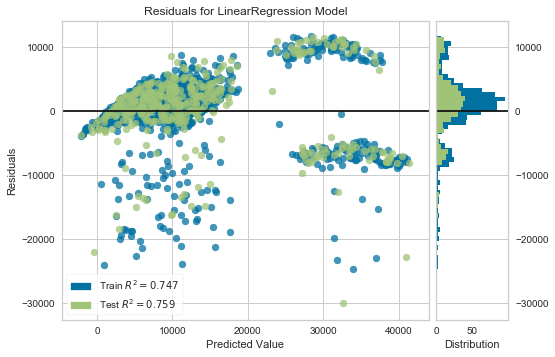

In [8]:
plot_model(lr)

# Experiment 2

In [9]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_0.0', 'age_1.0',
       'age_10.0', 'age_11.0', 'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0',
       'age_6.0', 'age_7.0', 'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0',
       'bmi_10.0', 'bmi_11.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0',
       'bmi_6.0', 'bmi_7.0', 'bmi_8.0', 'bmi_9.0',
       'smoker_yes_multiply_bmi_Power2', 'smoker_yes_multiply_children_1',
       'bmi_Power2_multiply_smoker_no', 'region_southeast_multiply_smoker_yes',
       'children_0_multiply_age_Power2', 'smoker_no_multiply_bmi_Power2',
       'age_Power2_multiply_smoker_yes', 'smoker_yes_multiply_sex_male',
       'region_northeast_multiply_bmi_Power2', 'bmi_6.0_multiply_smoker_yes',
       'smoker_yes_multiply_children_0', 'bmi_7.0_m

In [11]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2726.1710,19366833.6452,4400.7765,0.8843,0.3883,0.3049
1,3396.6190,32709339.4844,5719.2079,0.8098,0.4554,0.3384
2,2766.1353,21989054.2760,4689.2488,0.7216,0.4991,0.3311
3,3001.5524,23121064.0785,4808.4368,0.8069,0.5135,0.4178
4,3004.0893,26265566.3671,5124.9943,0.8046,0.4359,0.2730
5,3166.9416,23665252.1064,4864.6945,0.8478,0.3664,0.2887
6,2783.1541,24112792.1178,4910.4778,0.8359,0.3767,0.3098
7,3248.3565,28748610.8244,5361.7731,0.8419,0.4680,0.3049
8,2908.9754,20967357.6973,4579.0127,0.8646,0.3984,0.3399
9,3060.2174,28707335.5441,5357.9227,0.8151,0.4936,0.3402


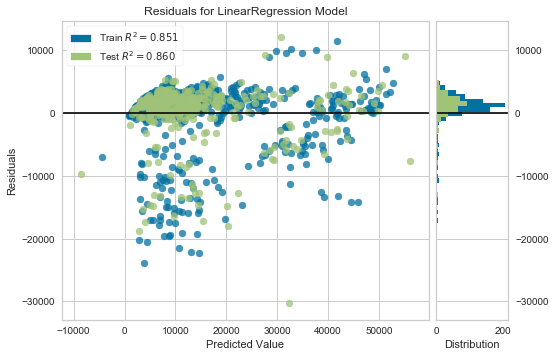

In [12]:
plot_model(lr)

In [13]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [14]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [15]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             t

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
